In [1]:
# Install lib
!pip install -q torch sahi yolov8 ultralytics numpy opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.4/756.4 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.8/61.8 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 

In [2]:
# Import lib
from sahi.utils.yolov8 import (
    download_yolov8s_model,
)

# Create model
from sahi import AutoDetectionModel

# Ultil to read, dowwnload image
from sahi.utils.cv import read_image
from sahi.utils.file import download_from_url

# Prediction
from sahi.predict import get_prediction, get_sliced_prediction, predict
from sahi.prediction import visualize_object_predictions

# Ultils
from IPython.display import Image
from numpy import asarray
import cv2

In [3]:
# Download weights YOLOV8
yolov8_model_path = "models/yolov8s.pt"
download_yolov8s_model(yolov8_model_path)

In [4]:
# Download sample data
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/small-vehicles1.jpeg', 'demo_data/small-vehicles1.jpeg')
download_from_url('https://raw.githubusercontent.com/obss/sahi/main/demo/demo_data/terrain2.png', 'demo_data/terrain2.png')

In [5]:
# Load model
detection_model = AutoDetectionModel.from_pretrained(
    model_type = "yolov8",
    model_path = yolov8_model_path,
    confidence_threshold = 0.5,
    device = "cuda:0"
)

### 1st example

In [6]:
# Dectect without SAHI
result = get_prediction("/content/demo_data/small-vehicles1.jpeg", detection_model)

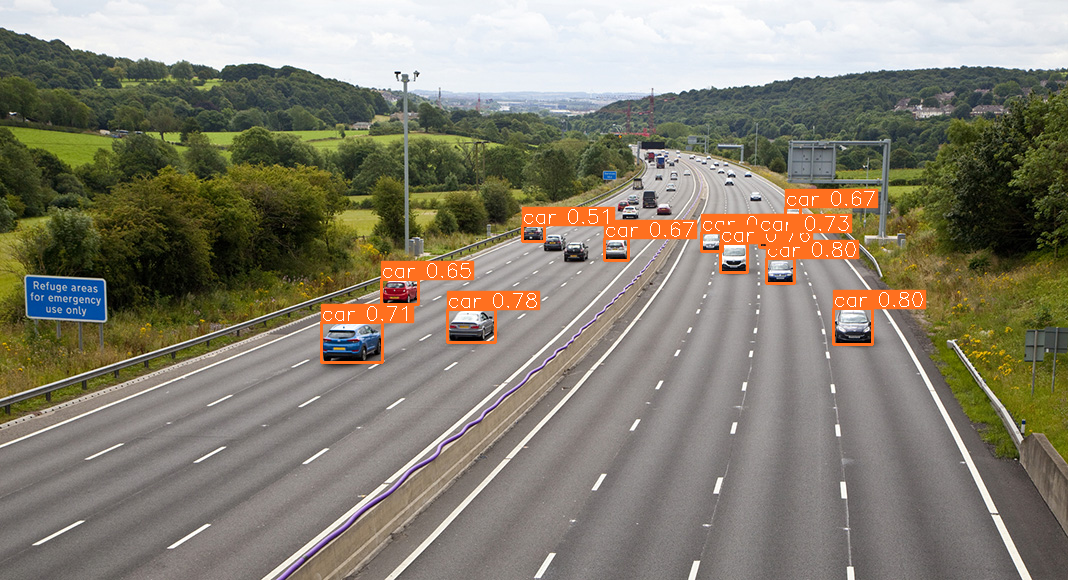

In [7]:
# Show result
result.export_visuals("demo_data/")
Image("demo_data/prediction_visual.png")

In [9]:
# Try with SAHI
result = get_sliced_prediction(
    "/content/demo_data/small-vehicles1.jpeg",
    detection_model = detection_model,
    slice_height = 256,
    slice_width = 256,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,

)

Performing prediction on 15 number of slices.


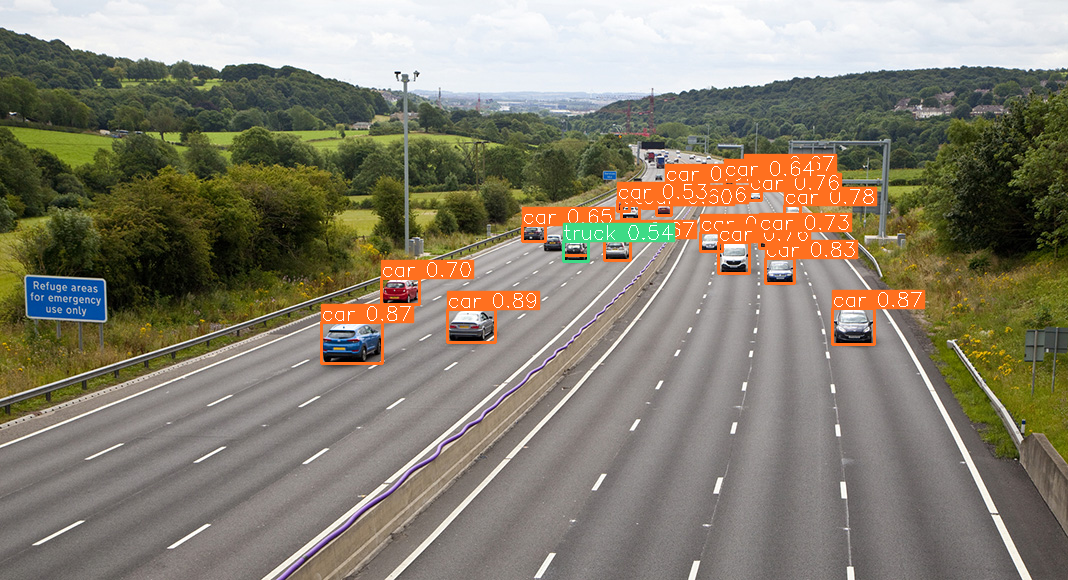

In [10]:
# Show result
result.export_visuals("demo_data/")
Image("demo_data/prediction_visual.png")

2nd Example

In [11]:
# Dectect without SAHI
result = get_prediction("/content/demo_data/terrain2.png", detection_model)

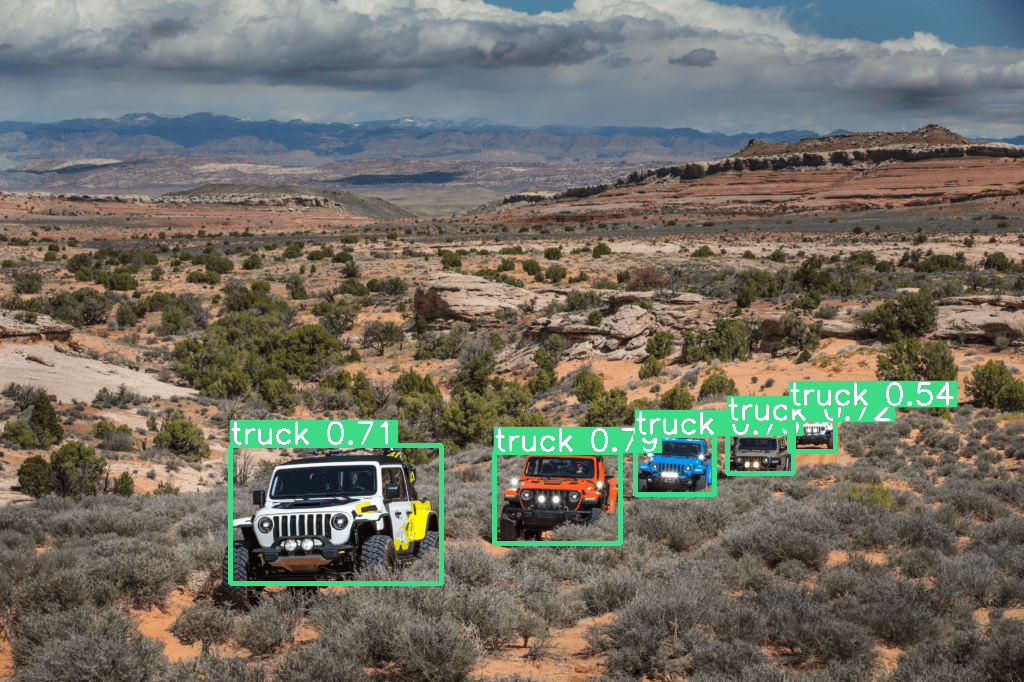

In [12]:
# Show result
result.export_visuals("demo_data/")
Image("demo_data/prediction_visual.png")

In [13]:
# Try with SAHI
result = get_sliced_prediction(
    "/content/demo_data/terrain2.png",
    detection_model = detection_model,
    slice_height = 128,
    slice_width = 128,
    overlap_height_ratio = 0.2,
    overlap_width_ratio = 0.2,

)

Performing prediction on 70 number of slices.


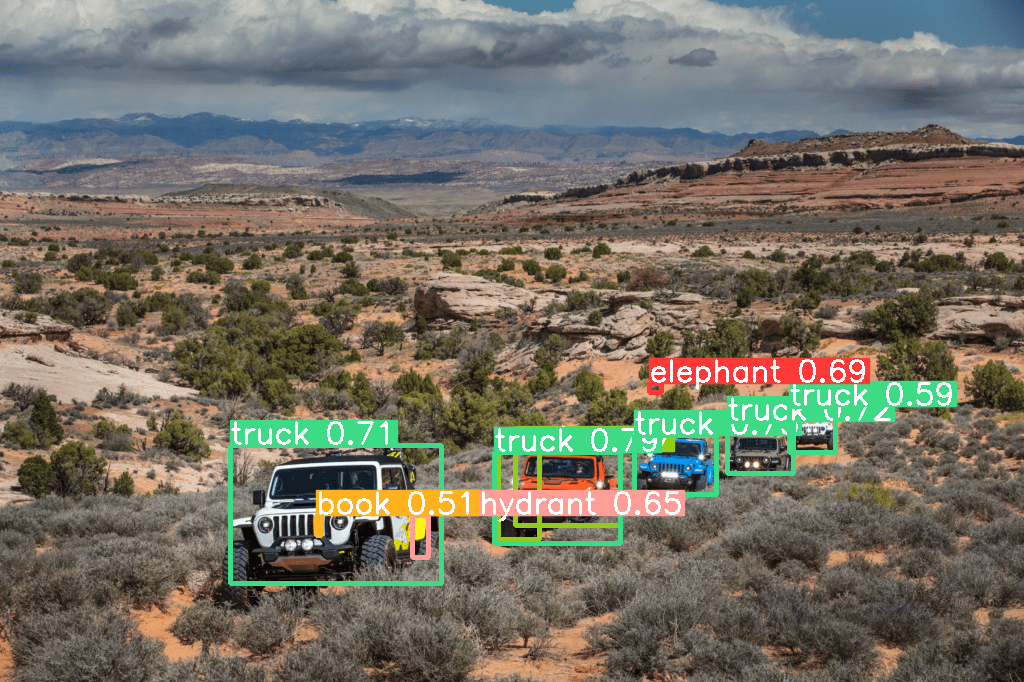

In [14]:
# Show result
result.export_visuals("demo_data/")
Image("demo_data/prediction_visual.png")